# ***Piyush Chachan***
# ***July 2024 Batch***
>  >    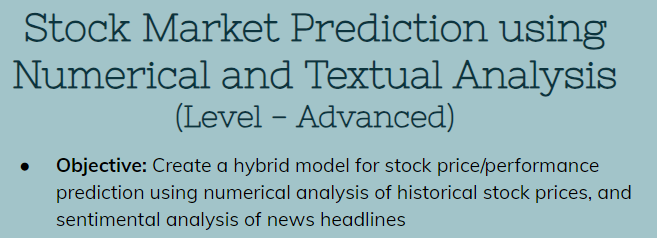

#  **Importing some required libraries**

In [ ]:
import pandas as pd
import numpy as np

from numpy import concatenate
from math import sqrt
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
# for visualize graphs in our dataframe
pd.pandas.set_option('display.max_columns', None)
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#  **Reading Data and EDA**

In [2]:
stock_price = pd.read_csv('/kaggle/input/stock-pred/RELIANCE.csv')
cols = ['Date','Category','News']
news_data = pd.read_csv('/kaggle/input/stock-pred/india-news-headlines (1).csv',names=cols,header=1)

In [3]:
stock_price = stock_price.drop(['Trades','Deliverable Volume','%Deliverble','VWAP','Series','Symbol','Prev Close','Turnover'],axis = 1)
stock_price

,Date,Open,High,Low,Last,Close,Volume
0,2000-01-03,237.50,251.70,237.50,251.70,251.70,4456424
1,2000-01-04,258.40,271.85,251.30,271.85,271.85,9487878
2,2000-01-05,256.65,287.90,256.65,286.75,282.50,26833684
3,2000-01-06,289.00,300.70,289.00,293.50,294.35,15682286
4,2000-01-07,295.00,317.90,293.00,314.50,314.55,19870977
...,...,...,...,...,...,...,...
5301,2021-04-26,1920.00,1962.00,1911.50,1938.00,1937.85,9620785
5302,2021-04-27,1940.00,1997.20,1938.25,1990.00,1988.65,9226547
5303,2021-04-28,1997.85,2008.00,1980.15,1993.15,1997.30,7902002
5304,2021-04-29,2022.90,2044.50,2007.30,2020.00,2024.05,8035915


In [4]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5306 non-null   object 
 1   Open    5306 non-null   float64
 2   High    5306 non-null   float64
 3   Low     5306 non-null   float64
 4   Last    5306 non-null   float64
 5   Close   5306 non-null   float64
 6   Volume  5306 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 290.3+ KB


In [5]:
clean_price=stock_price
clean_price['Date'] = pd.to_datetime(clean_price['Date']).dt.normalize()
clean_price=clean_price.set_index('Date')
clean_price = clean_price.sort_index(ascending=True, axis=0)
clean_price

,Open,High,Low,Last,Close,Volume
Date,,,,,,
2000-01-03,237.50,251.70,237.50,251.70,251.70,4456424
2000-01-04,258.40,271.85,251.30,271.85,271.85,9487878
2000-01-05,256.65,287.90,256.65,286.75,282.50,26833684
2000-01-06,289.00,300.70,289.00,293.50,294.35,15682286
2000-01-07,295.00,317.90,293.00,314.50,314.55,19870977
...,...,...,...,...,...,...
2021-04-26,1920.00,1962.00,1911.50,1938.00,1937.85,9620785
2021-04-27,1940.00,1997.20,1938.25,1990.00,1988.65,9226547
2021-04-28,1997.85,2008.00,1980.15,1993.15,1997.30,7902002


In [6]:
news_data

,Date,Category,News
0,20010102,unknown,Fissures in Hurriyat over Pak visit
1,20010102,unknown,America's unwanted heading for India?
2,20010102,unknown,For bigwigs; it is destination Goa
3,20010102,unknown,Extra buses to clear tourist traffic
4,20010102,unknown,Dilute the power of transfers; says Riberio
...,...,...,...
3650964,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650965,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650966,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650967,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [7]:
new_news_data=news_data
new_news_data = new_news_data.drop_duplicates()
new_news_data['Date'] = new_news_data['Date'].astype(str)
new_news_data['Date'] = new_news_data['Date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
new_news_data['Date'] = pd.to_datetime(new_news_data['Date']).dt.normalize()
new_news_data = new_news_data.filter(['Date', 'News'])
new_news_data = new_news_data.groupby(['Date'])['News'].apply(lambda x: ','.join(x)).reset_index()
new_news_data.set_index('Date', inplace= True)
new_news_data = new_news_data.sort_index(ascending=True, axis=0)
new_news_data

/tmp/ipykernel_33/247364078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_news_data['Date'] = new_news_data['Date'].astype(str)
/tmp/ipykernel_33/247364078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_news_data['Date'] = new_news_data['Date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
/tmp/ipykernel_33/247364078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,News
Date,
2001-01-02,"Fissures in Hurriyat over Pak visit,America's ..."
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2022-03-27,Playing a dead man in Body God meant sitting i...
2022-03-28,As fashion becomes democratic; demand for styl...
2022-03-29,Bobby Deol: Like my dad; I hope to be working ...


In [8]:
clean_price = pd.concat([clean_price, new_news_data], axis=1)
clean_price.dropna(axis=0, inplace=True)
clean_price

,Open,High,Low,Last,Close,Volume,News
Date,,,,,,,
2001-01-02,340.35,359.00,340.25,358.10,354.30,6623970.0,"Fissures in Hurriyat over Pak visit,America's ..."
2001-01-03,355.00,361.70,353.00,358.20,360.05,8844088.0,"Powerless north India gropes in the dark,Think..."
2001-01-04,359.10,366.90,356.20,357.00,357.80,5982701.0,The string that pulled Stephen Hawking to Indi...
2001-01-05,356.50,366.80,356.50,363.40,364.30,7460148.0,Light combat craft takes India into club class...
2001-01-08,362.50,367.45,357.25,358.00,360.20,6842731.0,"Sangh Parivar; Babri panel up the ante,Frontru..."
...,...,...,...,...,...,...,...
2021-04-26,1920.00,1962.00,1911.50,1938.00,1937.85,9620785.0,Badminton player Jwala Gutta wore the most gor...
2021-04-27,1940.00,1997.20,1938.25,1990.00,1988.65,9226547.0,nashik pvt docs help each other find o for pat...
2021-04-28,1997.85,2008.00,1980.15,1993.15,1997.30,7902002.0,"Mohali: 24 students test positive,After minist..."


In [9]:
clean_price['compound'] = ''
clean_price['negative'] = ''
clean_price['neutral'] = ''
clean_price['positive'] = ''
clean_price.head()

,Open,High,Low,Last,Close,Volume,News,compound,negative,neutral,positive
Date,,,,,,,,,,,
2001-01-02,340.35,359.00,340.25,358.1,354.30,6623970.0,"Fissures in Hurriyat over Pak visit,America's ...",,,,
2001-01-03,355.00,361.70,353.00,358.2,360.05,8844088.0,"Powerless north India gropes in the dark,Think...",,,,
2001-01-04,359.10,366.90,356.20,357.0,357.80,5982701.0,The string that pulled Stephen Hawking to Indi...,,,,
2001-01-05,356.50,366.80,356.50,363.4,364.30,7460148.0,Light combat craft takes India into club class...,,,,
2001-01-08,362.50,367.45,357.25,358.0,360.20,6842731.0,"Sangh Parivar; Babri panel up the ante,Frontru...",,,,


**Sentimental Analysis to calculate compound, positive, negative and neutral**

In [10]:
sid = SentimentIntensityAnalyzer()
def sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return pd.Series([scores['compound'], scores['neg'], scores['neu'], scores['pos']], index=['compound', 'negative', 'neutral', 'positive'])

clean_price[['compound', 'negative', 'neutral', 'positive']] = clean_price['News'].apply(sentiment_scores)
clean_price.head()

,Open,High,Low,Last,Close,Volume,News,compound,negative,neutral,positive
Date,,,,,,,,,,,
2001-01-02,340.35,359.00,340.25,358.1,354.30,6623970.0,"Fissures in Hurriyat over Pak visit,America's ...",-0.9621,0.119,0.817,0.064
2001-01-03,355.00,361.70,353.00,358.2,360.05,8844088.0,"Powerless north India gropes in the dark,Think...",0.6322,0.084,0.817,0.098
2001-01-04,359.10,366.90,356.20,357.0,357.80,5982701.0,The string that pulled Stephen Hawking to Indi...,0.6648,0.077,0.843,0.080
2001-01-05,356.50,366.80,356.50,363.4,364.30,7460148.0,Light combat craft takes India into club class...,0.9032,0.105,0.746,0.149
2001-01-08,362.50,367.45,357.25,358.0,360.20,6842731.0,"Sangh Parivar; Babri panel up the ante,Frontru...",-0.9638,0.119,0.855,0.026


In [11]:
new_price = clean_price
new_price.head()

,Open,High,Low,Last,Close,Volume,News,compound,negative,neutral,positive
Date,,,,,,,,,,,
2001-01-02,340.35,359.00,340.25,358.1,354.30,6623970.0,"Fissures in Hurriyat over Pak visit,America's ...",-0.9621,0.119,0.817,0.064
2001-01-03,355.00,361.70,353.00,358.2,360.05,8844088.0,"Powerless north India gropes in the dark,Think...",0.6322,0.084,0.817,0.098
2001-01-04,359.10,366.90,356.20,357.0,357.80,5982701.0,The string that pulled Stephen Hawking to Indi...,0.6648,0.077,0.843,0.080
2001-01-05,356.50,366.80,356.50,363.4,364.30,7460148.0,Light combat craft takes India into club class...,0.9032,0.105,0.746,0.149
2001-01-08,362.50,367.45,357.25,358.0,360.20,6842731.0,"Sangh Parivar; Babri panel up the ante,Frontru...",-0.9638,0.119,0.855,0.026


****Plotting the close price graph****

Text(0, 0.5, 'Close Price (Rs.)')

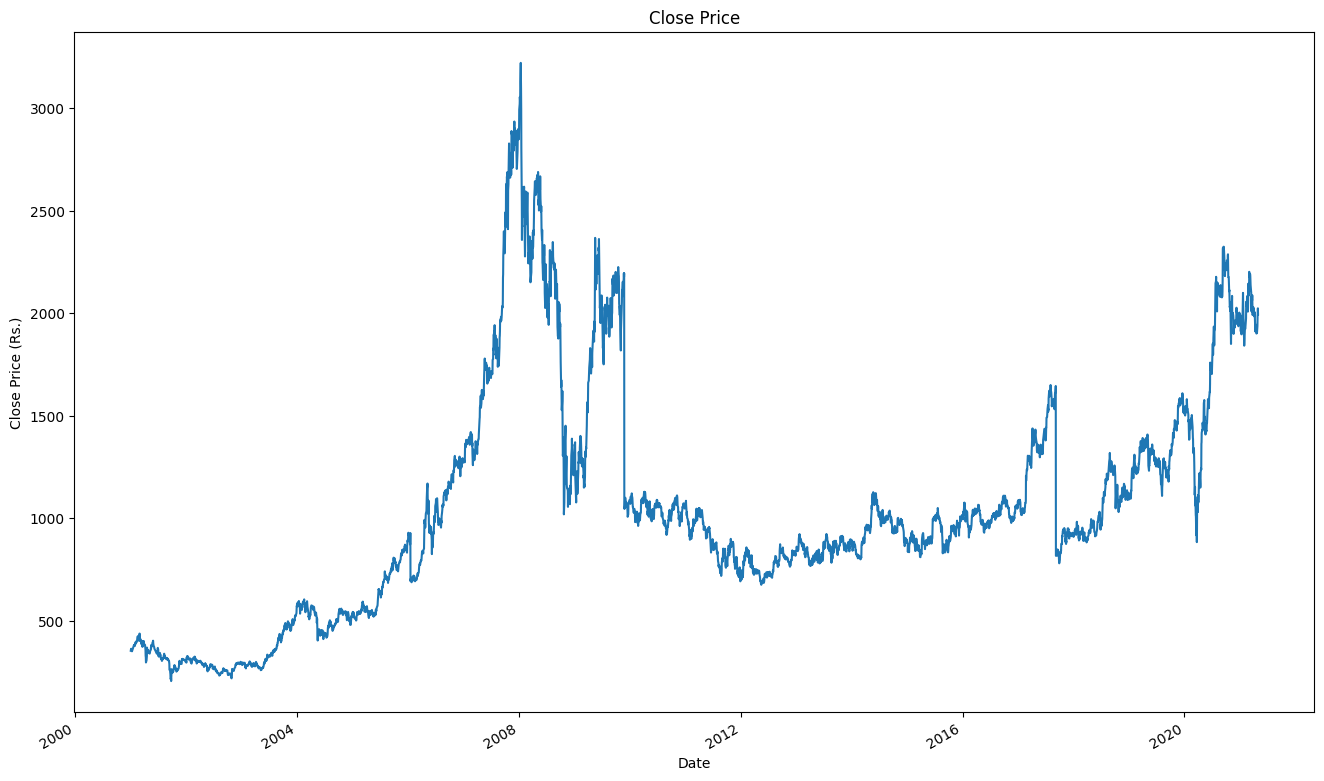

In [12]:
stock_data=new_price
plt.figure(figsize=(16,10))
stock_data['Close'].plot()
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (Rs.)')

***Dividing data into training and testing***

In [13]:
data_to_use = int((len(stock_data)-1))
train_end = int(data_to_use*0.85)
total_data = len(stock_data)
start = total_data - data_to_use
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 4271
Number of records in Test Data: 755


In [21]:
steps_to_predict = 1
close_price = stock_data.iloc[start:total_data,4] 
compound = stock_data.iloc[start:total_data,7]
negative = stock_data.iloc[start:total_data,8] 
neutral = stock_data.iloc[start:total_data,9] 
positive = stock_data.iloc[start:total_data,10]
open_price = stock_data.iloc[start:total_data,0] 
high = stock_data.iloc[start:total_data,1] 
low = stock_data.iloc[start:total_data,2] 
volume = stock_data.iloc[start:total_data,5] 
print("Close Price:")
close_price

Close Price:


Date
2001-01-03     360.05
2001-01-04     357.80
2001-01-05     364.30
2001-01-08     360.20
2001-01-09     357.95
               ...   
2021-04-26    1937.85
2021-04-27    1988.65
2021-04-28    1997.30
2021-04-29    2024.05
2021-04-30    1994.50
Name: Close, Length: 5025, dtype: float64

In [22]:
close_price_shifted = close_price.shift(-1) 
compound_shifted = compound.shift(-1) 
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,,
2001-01-03,360.05,357.80,0.6322,0.6648,8844088.0,355.00,361.70,353.00
2001-01-04,357.80,364.30,0.6648,0.9032,5982701.0,359.10,366.90,356.20
2001-01-05,364.30,360.20,0.9032,-0.9638,7460148.0,356.50,366.80,356.50
2001-01-08,360.20,357.95,-0.9638,-0.9559,6842731.0,362.50,367.45,357.25
2001-01-09,357.95,351.70,-0.9559,-0.5719,4513682.0,359.40,361.80,357.10
2001-01-10,351.70,381.65,-0.5719,0.9295,4730779.0,358.55,361.45,349.15
2001-01-23,381.65,380.35,0.9295,-0.9039,8274005.0,374.75,384.25,374.75
2001-01-24,380.35,381.70,-0.9039,-0.9854,5461105.0,384.40,384.50,378.50
2001-01-25,381.70,377.65,-0.9854,0.9697,4489764.0,381.50,383.50,376.65


***Target varible***

In [23]:
y = data['close_price_shifted']
y

Date
2001-01-03     357.80
2001-01-04     364.30
2001-01-05     360.20
2001-01-08     357.95
2001-01-09     351.70
               ...   
2021-04-23    1937.85
2021-04-26    1988.65
2021-04-27    1997.30
2021-04-28    2024.05
2021-04-29    1994.50
Name: close_price_shifted, Length: 5024, dtype: float64

In [24]:
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,
2001-01-03,360.05,0.6322,0.6648,8844088.0,355.00,361.70,353.00
2001-01-04,357.80,0.6648,0.9032,5982701.0,359.10,366.90,356.20
2001-01-05,364.30,0.9032,-0.9638,7460148.0,356.50,366.80,356.50
2001-01-08,360.20,-0.9638,-0.9559,6842731.0,362.50,367.45,357.25
2001-01-09,357.95,-0.9559,-0.5719,4513682.0,359.40,361.80,357.10
...,...,...,...,...,...,...,...
2021-04-23,1904.35,-0.9997,-0.9995,5459016.0,1906.00,1918.90,1895.35
2021-04-26,1937.85,-0.9995,-0.9999,9620785.0,1920.00,1962.00,1911.50
2021-04-27,1988.65,-0.9999,-0.9997,9226547.0,1940.00,1997.20,1938.25


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)
x[0:5], y

(array([[-0.89818363,  0.6322    ,  0.6648    , -0.73023848, -0.90602636,
         -0.91078285, -0.89828778],
        [-0.89967654,  0.6648    ,  0.9032    , -0.81804062, -0.903371  ,
         -0.90739897, -0.8961092 ],
        [-0.89536369,  0.9032    , -0.9638    , -0.77270491, -0.90505489,
         -0.90746405, -0.89590496],
        [-0.8980841 , -0.9638    , -0.9559    , -0.79165046, -0.901169  ,
         -0.90704106, -0.89539436],
        [-0.89957701, -0.9559    , -0.5719    , -0.86311771, -0.90317671,
         -0.91071777, -0.89549648]]),
 array([[-0.89967654],
        [-0.89536369],
        [-0.8980841 ],
        ...,
        [ 0.18815626],
        [ 0.20590528],
        [ 0.18629842]]))

***Splitting into training and testing data after processing***

In [26]:
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (4271, 7) and y: (4271, 1)
Number of rows and columns in the Test set X: (752, 7) and y: (752, 1)


In [27]:
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (4271, 7, 1)
Shape of Test set X: (752, 7, 1)


**Creating LSTM Model for prediction of stock prices of Reliance**

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation
np.random.seed(2016)
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.summary()

2024-07-20 08:57:59.254262: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-20 08:57:59.254418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-20 08:57:59.436718: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 7, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='mse' , optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0862 - val_loss: 7.3511e-04
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0026 - val_loss: 5.9573e-04
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0026 - val_loss: 5.5709e-04
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0020 - val_loss: 8.7485e-04
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0023 - val_loss: 6.0238e-04
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0023 - val_loss: 5.1364e-04
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0019 - val_loss: 7.3968e-04
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 9/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0018 - val_loss: 5.5157e-04
Epoch 10/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0019 - val_loss: 0.0011


**Saving model**

In [32]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.weights.h5')
print('Model is saved to the disk')

Model is saved to the disk


In [33]:
X_test[0:5]

array([[[-0.51533549],
        [-0.9999    ],
        [-0.9999    ],
        [-0.87628877],
        [-0.53074706],
        [-0.53445695],
        [-0.50648466]],

       [[-0.51055818],
        [-0.9999    ],
        [-1.        ],
        [-0.8669524 ],
        [-0.52715262],
        [-0.52977159],
        [-0.50137863]],

       [[-0.51470515],
        [-1.        ],
        [-0.9999    ],
        [-0.89835919],
        [-0.52375247],
        [-0.52912084],
        [-0.50202539]],

       [[-0.51185204],
        [-0.9999    ],
        [-1.        ],
        [-0.86410789],
        [-0.5277355 ],
        [-0.53120323],
        [-0.50205943]],

       [[-0.52140665],
        [-1.        ],
        [-0.9998    ],
        [-0.89884024],
        [-0.52844791],
        [-0.53325307],
        [-0.51145454]]])

**Predicting the stock prices by putting data in model**

In [34]:
predictions = model.predict(X_test) 
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))
print('Predictions:')
predictions[0:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Predictions:


array([[ 972.8139 ],
       [ 980.08453],
       [ 980.2738 ],
       [ 978.69525],
       [ 969.3822 ],
       [ 973.8597 ],
       [ 988.8177 ],
       [1010.7396 ],
       [1013.7599 ],
       [1035.6266 ]], dtype=float32)

In [35]:
train_loss = model.evaluate(X_train, y_train, batch_size = 1)
test_loss = model.evaluate(X_test, y_test, batch_size = 1)
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

4271/4271 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0011
752/752 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0010
Train Loss = 0.0013
Test Loss = 0.0015


**Calculating RMS**

In [36]:
root_mean_square_error = np.sqrt(np.mean(np.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

Root Mean Square Error = 1577.5456


In [38]:
from sklearn import metrics
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 1577.5456


In [39]:
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

**Plot comparing the actual to predicted prices**

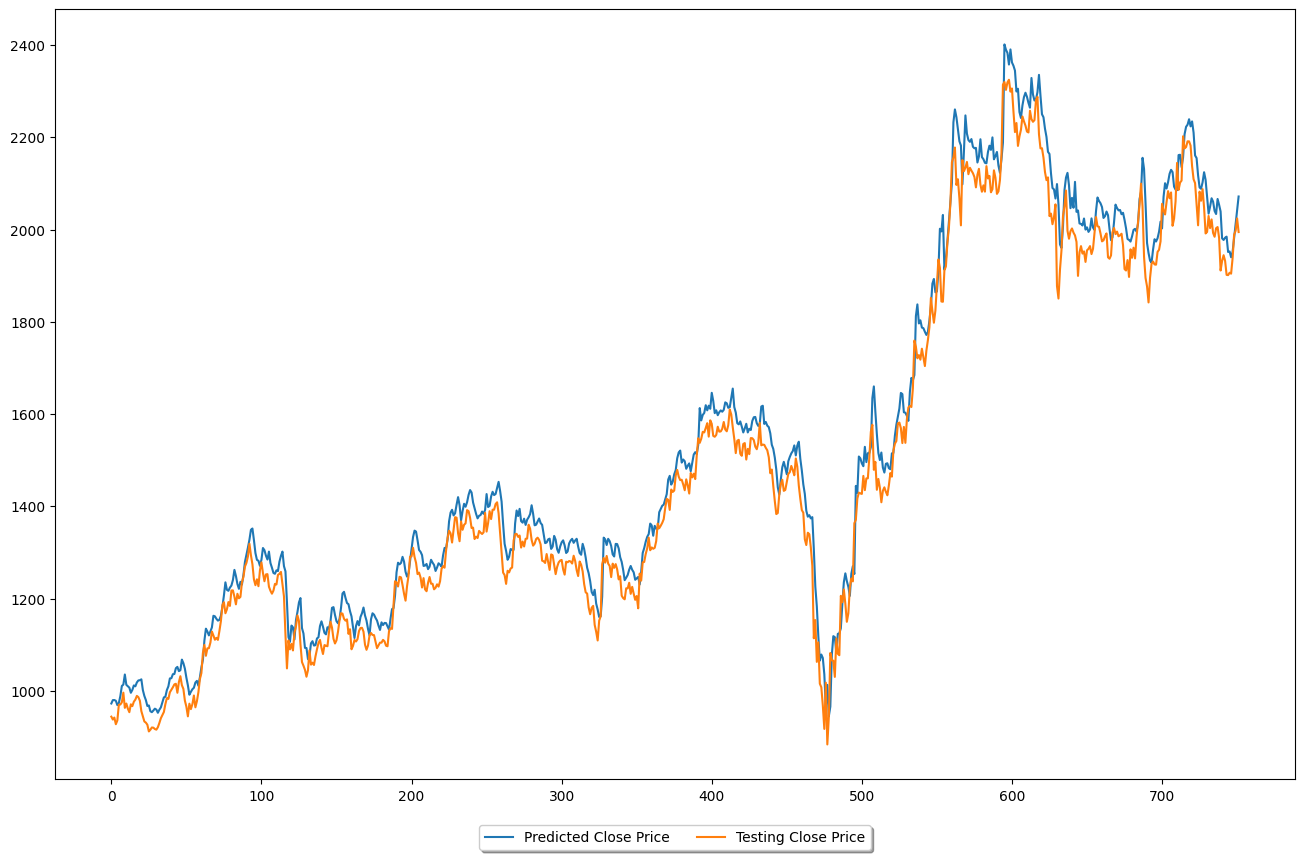

In [40]:
plt.figure(figsize=(16,10))
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()